# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**


Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

In [1]:
#Installing scikit-learn-extra
!pip install scikit-learn-extra

In [88]:
# Importing all the necessary packages

import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [89]:
data = pd.read_excel('Credit Card Customer Data.xlsx')

data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Check the info of the data**

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are **660 observations and 7 columns** in the dataset.
- All the columns have 660 non-null values, i.e., there are **no missing values**.
- **All the columns are of integer data type**.

**There are no missing values. Let us now figure out the number of unique values in each column.** 

In [91]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has duplicate values. We will treat the duplicate customer keys before applying any algorithm.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking duplicate customer keys**

As mentioned above, the Customer Key column has duplicate values. Let's find the rows with duplicate customer keys.

In [92]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data['Customer Key'].duplicated()

data[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


- There are **5 duplicate customer keys**. We can **drop these observations**.

**Note:** We are not making any assumptions about which row with the duplicate keys should be dropped. For example, if row 2 and row 10 have duplicate customer keys, then any one of the two rows can be dropped.

In [93]:
# let's drop duplicate keys

data = data.drop_duplicates(subset=['Customer Key'], keep='last')

In [94]:
data.shape

(655, 7)

### **Dropping columns** 

We have done some basic checks. Now, **let's drop the variables that are not required for our analysis**.

In [95]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

### **Checking duplicate rows**

Now, that we have dropped unnecessary columns, we can again check for duplicates. **Duplicates would mean customers with identical features.**

In [96]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


- There are 11 duplicate rows. We can drop these duplicate rows from the data.

In [97]:
data = data[~data.duplicated()]

In [98]:
data.shape

(644, 5)

- After removing the duplicate keys, the duplicate rows, and dropping unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary Statistics**

In [99]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34869.565217,37838.262734,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,644.0,4.714286,2.178443,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,644.0,2.399068,1.618535,0.0,1.0,2.0,4.0,5.0
Total_visits_online,644.0,2.619565,2.937343,0.0,1.0,2.0,4.0,15.0
Total_calls_made,644.0,3.582298,2.868458,0.0,1.0,3.0,5.0,10.0


**Observations:** 
- The median value of average credit limit is 18000, while mean is around 34500. Standard deviation is very huge accounted for around 37500.
- On average customers make more calls compare to visiting banks.

**Now, let's go ahead with exploring each variable at hand.**

### **Checking the distribution and outliers for each variable in the data**

Avg_Credit_Limit
Skew : 2.19


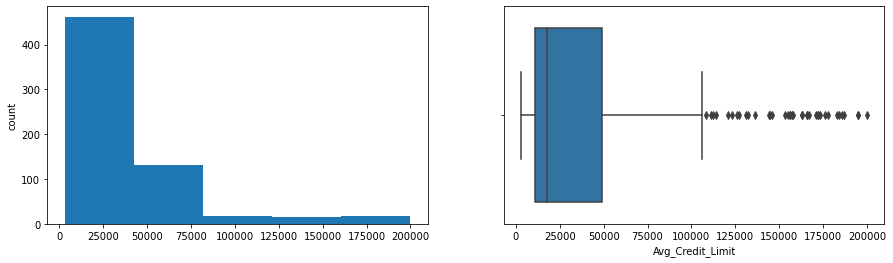

Total_Credit_Cards
Skew : 0.15


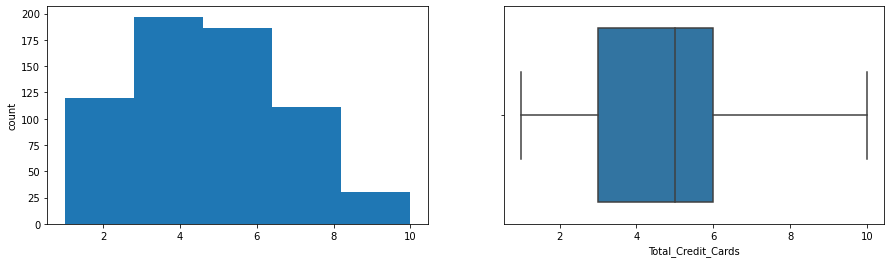

Total_visits_bank
Skew : 0.15


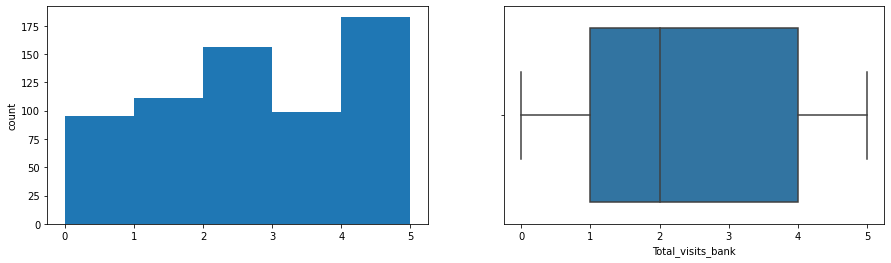

Total_visits_online
Skew : 2.22


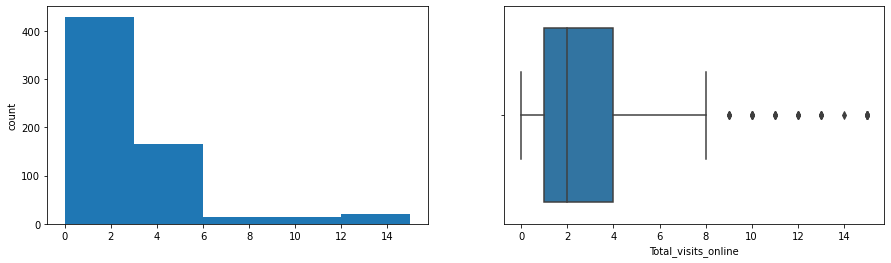

Total_calls_made
Skew : 0.66


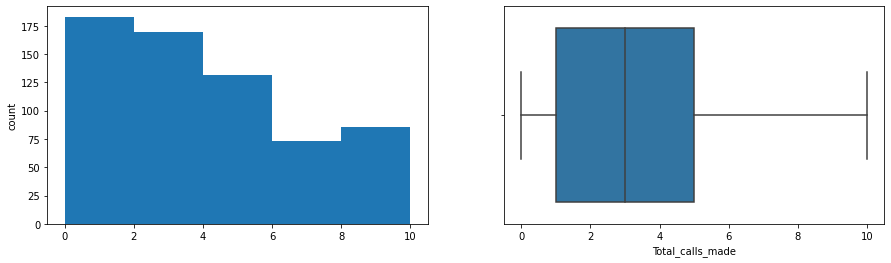

In [100]:
# distribution plot to check for outliers 

for col in data.columns:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins=5, grid=False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observation:**
- Average_credit_limit and Total_visits_online are highly right-skewed and have lots of outliers.
- While total_visits_bank is moderately left-skewed, Total_call_made is moderately right skewed. However, from the boxplot, we can see there is no outliers in both groups. 

### **Checking correlation**

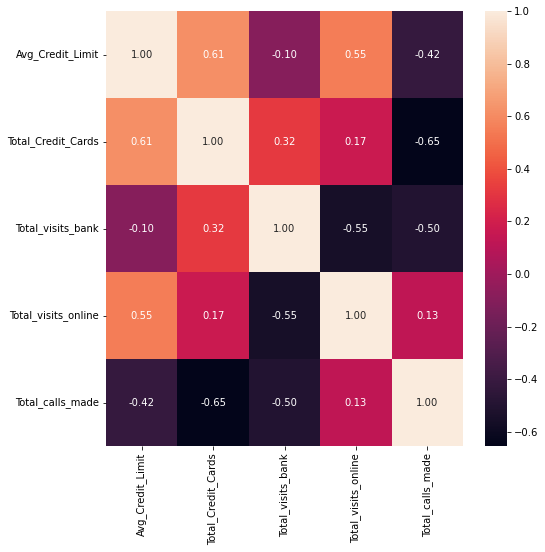

In [101]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

### **Scaling the data**

In [102]:
scaler = StandardScaler()

# Standardizing the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(data)

### **Applying PCA on scaled data**

In [103]:
from sklearn.decomposition import PCA

n = data.shape[1]

# Creating a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

# Saving components to a DataFrame
data_pca = pd.DataFrame(principal_components, columns = data.columns)

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

In [104]:
# Creating copy of the data to store labels from each algorithm

data_copy = data_pca.copy(deep = True)

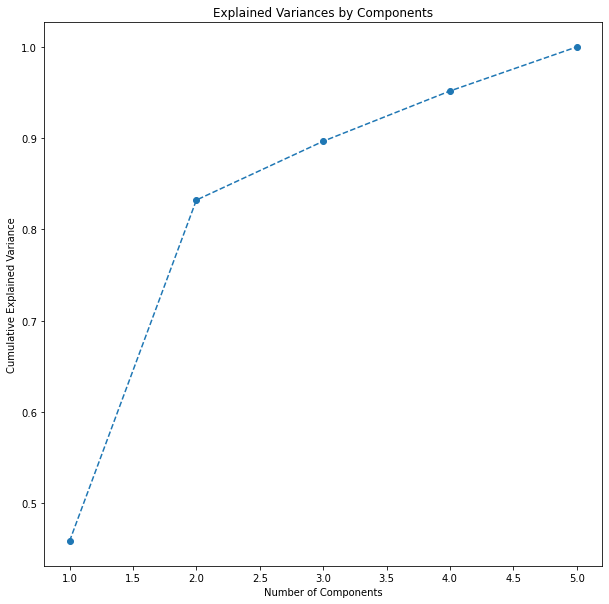

In [105]:
# Visualizing the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 6), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initializing a dictionary to store the Sum of Squared Error (SSE) for each K
2. Running for a range of Ks and store SSE for each run
3. Plotting the SSE vs K and plot the elbow curve

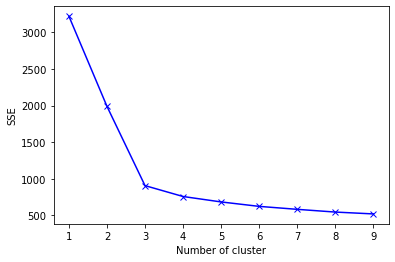

In [106]:
# step 1
sse = {} 

# step 2 - iterating for a range of Ks and fitting the pca components to the algorithm. 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_     # Using inertia attribute from the clustering object and storing the inertia value for that K

# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

**Observation:**
From the above graph, we can observe that a steep decline happens in the line for sum of squares till it reaches to 3 on the x axis. After that the fall seems steady. Therefore, we can pick 3 as the number of cluster for K-means. 

In [107]:
kmeans = KMeans(n_clusters=3, random_state=1)                  # Applying the K-Means algorithm
kmeans.fit(data_pca)                          # Fitting the kmeans function on the pca components

# Adding predicted labels to the original data and the copied data 
data_copy['Labels'] = kmeans.predict(data_pca)     # Saving the predictions on the pca components from K-Means
data['Labels'] = kmeans.predict(data_pca)            # Saving the predictions on the pca components from K-Means

We have generated the labels with K-means. Now, let us look at the various features based on the labels.

### **Cluster profiles**

In [108]:
# Number of observations in each cluster
data.Labels.value_counts()

1    376
0    219
2     49
Name: Labels, dtype: int64

In [109]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12246.575342,34101.063830,141877.551020,12000.0,32000.0,146000.0
Total_Credit_Cards,2.406393,5.526596,8.795918,2.0,6.0,9.0
Total_visits_bank,0.949772,3.476064,0.612245,1.0,3.0,1.0
Total_visits_online,3.575342,0.986702,10.877551,4.0,1.0,11.0
Total_calls_made,6.872146,1.997340,1.040816,7.0,2.0,1.0


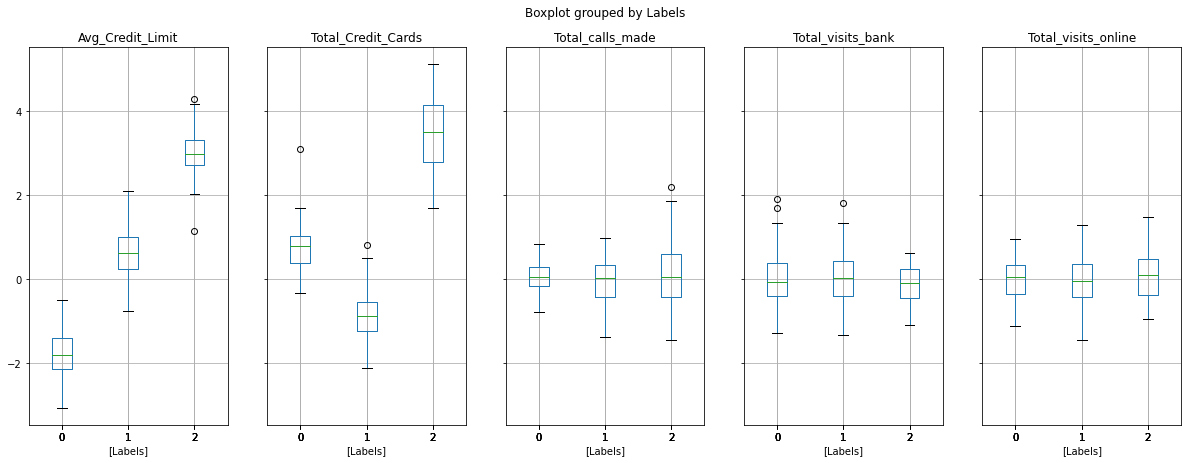

In [111]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:**
- Low value customers: Group 0 have lowest Avg_Credit_Limit, moderte credit cards, moderate visit to banks, made low calls, and less visit on online. This group may be consists of limited income/ financial needs people, young consumer, less educated/uneducated people, and unemployed people.
- Medium value customers: Group 1 have average credit limit, low credit card, highest visit to banks, moderate visit to online, and moderate calls made. This segment of customer may be consists of retired/aged people, housemaker mothers.
- High value customers: Group 2 have highest number of credit cards, highest credit limit, made less calls, made less visit to banks, but highest presence in online banking. This group may consists of working/business professionals, high income people. 

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

In [112]:
gmm = GaussianMixture(n_components = 3, random_state =1)     # Applying the Gaussian Mixture algorithm on the pca components with n_components=3 and random_state=1

gmm.fit(data_pca)    # Fitting the model on the pca components

data_copy['GmmLabels'] = gmm.predict(data_pca)

data['GmmLabels'] = gmm.predict(data_pca)

In [113]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

1    376
0    219
2     49
Name: GmmLabels, dtype: int64

In [114]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12246.575342,34101.063830,141877.551020,12000.0,32000.0,146000.0
Total_Credit_Cards,2.406393,5.526596,8.795918,2.0,6.0,9.0
Total_visits_bank,0.949772,3.476064,0.612245,1.0,3.0,1.0
Total_visits_online,3.575342,0.986702,10.877551,4.0,1.0,11.0
Total_calls_made,6.872146,1.997340,1.040816,7.0,2.0,1.0


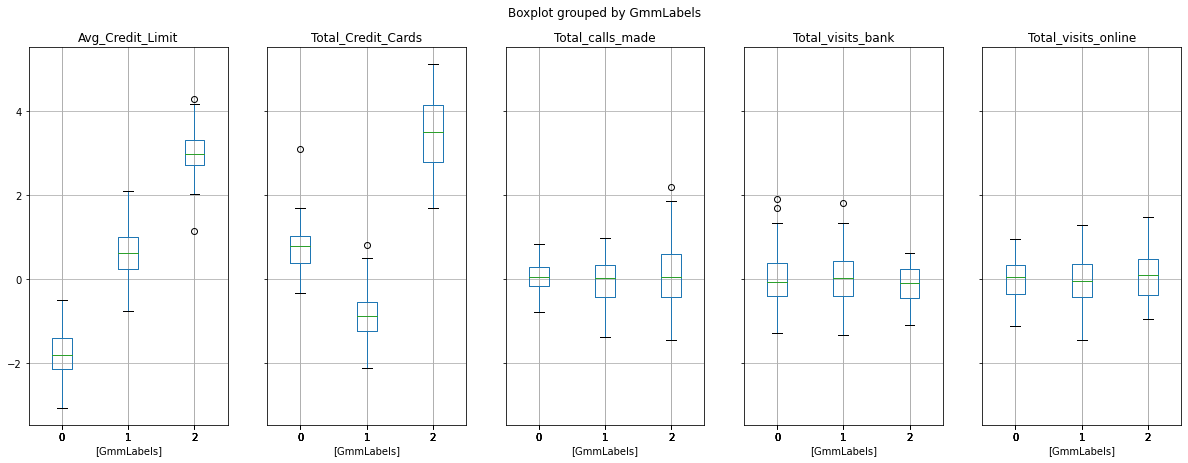

In [115]:
# Plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

**Cluster Profiles:**
- Low value customers: Group 0 have lowest Avg_Credit_Limit, moderte credit cards, moderate visit to banks, made low calls, and less visit on online. This group may be consists of limited income/ financial needs people, young consumer, less educated/uneducated people, and unemployed people.
- Medium value customers: Group 1 have average credit limit, low credit card, highest visit to banks, moderate visit to online, and moderate calls made. This segment of customer may be consists of retired/aged people, housemaker mothers.
- High value customers: Group 2 have highest number of credit cards, highest credit limit, made less calls, made less visit to banks, but highest presence in online banking. This group may consists of working/business professionals, high income people.

**Comparing Clusters:**
Gaussian Mixture Model and KMeans cluster provide almost same result. Therefore, we can choose any of these.

## **K-Medoids**

In [116]:
kmedo = KMedoids(n_clusters=3, random_state=1)     # Applying the K-Medoids algorithm on the pca components with n_components=3 and random_state=1

kmedo.fit(data_pca)      # Fitting the model on the pca components

data_copy['kmedoLabels'] = kmedo.predict(data_pca)

data['kmedoLabels'] = kmedo.predict(data_pca)

In [117]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

2    271
0    219
1    154
Name: kmedoLabels, dtype: int64

In [118]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12210.045662,80500.000000,27250.922509,12000.0,66000.0,19000.0
Total_Credit_Cards,2.415525,6.746753,5.416974,2.0,7.0,6.0
Total_visits_bank,0.958904,1.811688,3.896679,1.0,2.0,4.0
Total_visits_online,3.579909,4.136364,0.981550,4.0,2.0,1.0
Total_calls_made,6.885845,2.000000,1.811808,7.0,2.0,2.0


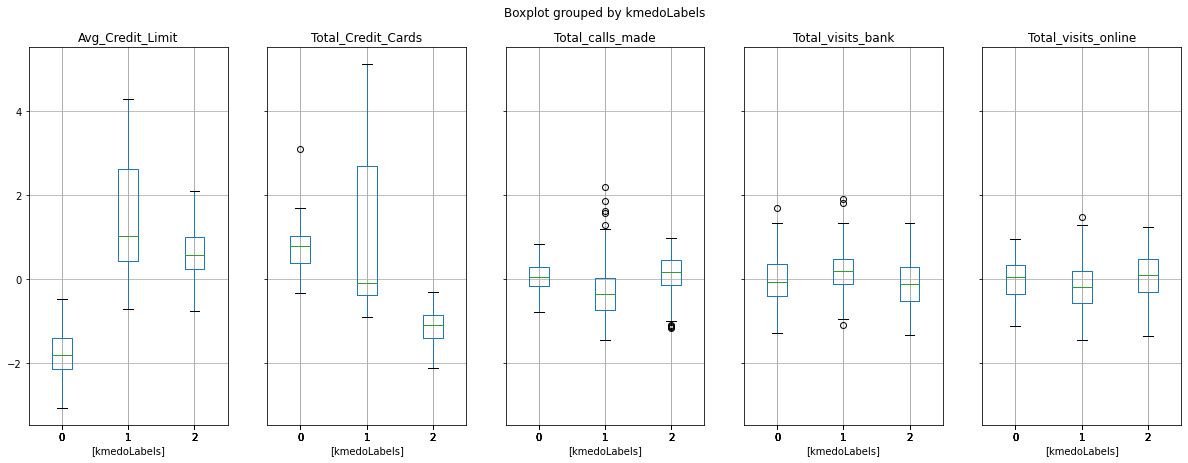

In [119]:
# Plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:**
- Low value customers: Group 0 have lowest Avg_Credit_Limit, highest median credit cards, moderate visit to banks, made moderate calls, and moderate visit on online. This group may be consists of limited income/ financial needs people, young consumer, less educated/uneducated people, and unemployed people.
- High value customers: Group 1 have moderate number of credit cards, highest credit limit, made less calls, made moderate visit to banks, but less presence in online banking. This group may consists of working/business professionals, high income people.
- Medium value customers: Group 2 have average credit limit, low credit card, lowest visit to banks, highest visit to online, and highest calls made. This segment of customer may be consists of retired/aged people, housemaker mothers.


Let's compare the clusters from K-Means and K-Medoids 

In [120]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12210.045662,12246.575342,2.415525,2.406393,0.958904,0.949772,3.579909,3.575342,6.885845,6.872146
group_1 Mean,80500.000000,34101.063830,6.746753,5.526596,1.811688,3.476064,4.136364,0.986702,2.000000,1.997340
group_2 Mean,27250.922509,141877.551020,5.416974,8.795918,3.896679,0.612245,0.981550,10.877551,1.811808,1.040816
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,66000.000000,32000.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,19000.000000,146000.000000,6.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Comparing Clusters:**
By comparing both the KMeans and KMedoids, we can say KMedoids is the better option as it provides same weightage of customers to each clusters and provide us clusters with more realistic feature selections.